In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd  drive/My Drive/BrewingDataCup/

/content/drive/My Drive/BrewingDataCup


In [3]:
import pandas as pd

clients_df = pd.read_csv("clients_attributes.csv")
sales_df = pd.read_csv("sales.csv",encoding="iso8859-1")
active_promos_df = pd.read_csv("active_promos.csv")
executed_promos_df = pd.read_csv("executed_promos.csv")
test_df = pd.read_csv("test.csv")

In [5]:
test_df.head(5)

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,NaN
1,17,29,9,NaN
2,37,29,9,NaN
3,46,29,9,NaN
4,48,29,9,NaN


In [4]:
sales_df.sort_values(by=['Marca','Cupo'], ascending=[True, True],inplace=True)
sales_df.dropna(inplace=True)
sales_df

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
114126,998,2019,8,1,2.0,1,30.0,6000.30,0.05,-2999.70
175278,854,2019,8,1,2.0,1,30.0,3000.15,0.03,-1499.85
198370,977,2019,8,1,2.0,1,30.0,3000.15,0.03,-1499.85
313597,2872,2019,8,1,2.0,1,30.0,3000.15,0.03,-1499.85
313702,2876,2019,8,1,2.0,1,30.0,3000.15,0.03,-1499.85
...,...,...,...,...,...,...,...,...,...,...
1879900,13547,2019,8,1,4.0,50,28.0,128352.65,0.18,0.00
1885115,14097,2019,7,1,4.0,50,28.0,12835.27,0.02,0.00
1892066,14799,2019,7,1,4.0,50,28.0,3208.82,0.00,0.00
1893697,15000,2019,8,1,4.0,50,28.0,12835.27,0.02,0.00


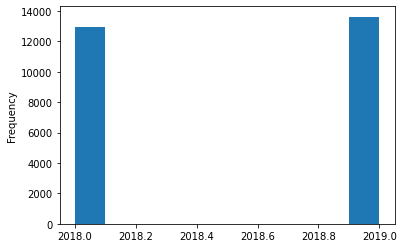

In [12]:
sales_df.loc[sales_df['Hl']==0,'Año'].plot(kind='hist')

In [37]:
sales_df.groupby(['Cliente']).count()

,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
Cliente,,,,,,,,,
1,179,179,179,179,179,179,179,179,179
2,180,180,180,180,180,180,180,180,180
3,100,100,100,100,100,100,100,100,100
4,139,139,139,139,139,139,139,139,139
5,37,37,37,37,37,37,37,37,37
...,...,...,...,...,...,...,...,...,...
15065,39,39,39,39,39,39,39,39,39
15066,63,63,63,63,63,63,63,63,63
15067,22,22,22,22,22,22,22,22,22


In [38]:
sales_df_1month = sales_df.groupby(['Cliente', 'Marca','Cupo','Año','Mes'])['Hl','Nr','Dcto'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [39]:
sales_df_1month= sales_df_1month.reset_index()
sales_df_1month

,Cliente,Marca,Cupo,Año,Mes,Hl,Nr,Dcto
0,1,1,35.0,2018,12,0.04,6750.00,-2250.00
1,1,1,35.0,2019,2,0.02,3600.00,-900.00
2,1,2,6.0,2018,6,0.07,11605.40,-2880.00
3,1,2,16.0,2018,1,0.09,19886.53,-5096.93
4,1,2,16.0,2018,5,0.03,6749.90,0.00
...,...,...,...,...,...,...,...,...
1893135,15069,44,32.0,2019,4,0.02,6295.46,0.00
1893136,15069,44,32.0,2019,5,0.04,12590.92,0.00
1893137,15069,44,32.0,2019,6,0.07,24552.29,-632.77
1893138,15069,44,32.0,2019,7,0.04,12590.92,0.00


In [40]:
sales_df_1month['Dt']=pd.to_datetime(sales_df_1month.Año*10000+sales_df_1month.Mes*100+1,format='%Y%m%d')
sales_df_1month.head(5)

,Cliente,Marca,Cupo,Año,Mes,Hl,Nr,Dcto,Dt
0,1,1,35.0,2018,12,0.04,6750.00,-2250.00,2018-12-01
1,1,1,35.0,2019,2,0.02,3600.00,-900.00,2019-02-01
2,1,2,6.0,2018,6,0.07,11605.40,-2880.00,2018-06-01
3,1,2,16.0,2018,1,0.09,19886.53,-5096.93,2018-01-01
4,1,2,16.0,2018,5,0.03,6749.90,0.00,2018-05-01


In [6]:
active_promos_df['Fecha_Desde']=pd.to_datetime(active_promos_df['Fecha_Desde'])

In [7]:
active_promos_df.sort_values(by=['Cliente'], ascending=[True],inplace=True)

In [12]:
active_promos_df['Año-Mes']= active_promos_df.apply(lambda row: pd.to_datetime(row['Fecha_Desde'].year*10000+row['Fecha_Desde'].month*100+3,format='%Y%m%d'),axis=1)


In [179]:
from datetime import datetime
from dateutil.relativedelta import relativedelta


def test_func(row,timep):
  print(row.Cliente)
  date_minus_n_months = row['Año-Mes'] - relativedelta(months=(timep+1))
  date_minus_1_month = row['Año-Mes'] - relativedelta(months=1)
  rows_to_agg = sales_df_1month.loc[(sales_df_1month['Cliente']==row['Cliente']) &
                      (sales_df_1month['Marca']==row['Marca']) &
                      (sales_df_1month['Cupo']==row['Cupo']) & 
                      (sales_df_1month['Dt']>date_minus_n_months) &
                      (sales_df_1month['Dt']<date_minus_1_month)]
  if (len(rows_to_agg)==0):
    hl=0
    dcto_porc=0
  else:
    hl = rows_to_agg['Hl'].sum()
    dcto_porc= -1*(rows_to_agg['Dcto'].sum()) / (rows_to_agg['Nr'].sum()-rows_to_agg['Dcto'].sum())
  return hl, dcto_porc

In [177]:
active_promos_df_trans = active_promos_df.groupby(by=['Marca','Cupo','Cliente','Año-Mes']).count()['CodigoDC'].reset_index().rename(columns={'CodigoDC':'nProms'})
active_promos_df_trans.head(5)

,Marca,Cupo,Cliente,Año-Mes,nProms
0,29,9,1,2019-08-03,1
1,29,9,1,2019-09-03,2
2,29,9,2,2019-05-03,2
3,29,9,2,2019-08-03,2
4,29,9,2,2019-09-03,2


In [ ]:
new_columns = active_promos_df_trans.apply(lambda row: test_func(row,3),axis=1)

In [188]:
active_promos_df_trans['Hl_sum_3M'] = new_columns.apply(lambda x: x[0])
active_promos_df_trans['Dcto_porc_3M'] = new_columns.apply(lambda x: x[1])

In [195]:
active_promos_df_trans.head(10)


,Marca,Cupo,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M
0,29,9,1,2019-08-03,1,0.02,-0.000000
1,29,9,1,2019-09-03,2,0.02,-0.000000
2,29,9,2,2019-05-03,2,0.09,0.115421
3,29,9,2,2019-08-03,2,0.03,-0.000000
4,29,9,2,2019-09-03,2,0.00,0.000000
5,29,9,4,2019-05-03,1,0.00,0.000000
6,29,9,4,2019-08-03,1,0.02,-0.000000
7,29,9,6,2019-08-03,1,0.00,0.000000
8,29,9,6,2019-09-03,2,0.00,0.000000
9,29,9,8,2019-04-03,1,0.07,-0.000000


In [ ]:
new_columns_6M = active_promos_df_trans.apply(lambda row: test_func(row,6),axis=1)

In [197]:
active_promos_df_trans['Hl_sum_6M'] = new_columns_6M.apply(lambda x: x[0])
active_promos_df_trans['Dcto_porc_6M'] = new_columns_6M.apply(lambda x: x[1])

In [198]:
active_promos_df_trans.head(5)

,Marca,Cupo,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M
0,29,9,1,2019-08-03,1,0.02,-0.000000,0.02,-0.000000
1,29,9,1,2019-09-03,2,0.02,-0.000000,0.02,-0.000000
2,29,9,2,2019-05-03,2,0.09,0.115421,0.09,0.115421
3,29,9,2,2019-08-03,2,0.03,-0.000000,0.12,0.086579
4,29,9,2,2019-09-03,2,0.00,0.000000,0.03,-0.000000


In [ ]:
new_columns_1M = active_promos_df_trans.apply(lambda row: test_func(row,1),axis=1)

In [209]:
active_promos_df_trans['Hl_sum_1M'] = new_columns_1M.apply(lambda x: x[0])
active_promos_df_trans['Dcto_porc_1M'] = new_columns_1M.apply(lambda x: x[1])

In [216]:
import pickle
with open('active_promos_df_trans.obj', 'wb') as fp:
  pickle.dump(active_promos_df_trans, fp)

In [67]:
import pickle
with open('active_promos_df_trans.obj','rb') as fp:
  active_promos_df_trans= pickle.load(fp)

In [68]:
active_promos_df_trans.head(5)

,Marca,Cupo,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M,Hl_sum_prodSim_1M,Dcto_porc_prodSim_1M
0,29,9,1,2019-08-03,1,0.02,-0.000000,0.02,-0.000000,0.0,0.0,0.010,-0.000000,0.010,-0.000000,0.01,-0.0
1,29,9,1,2019-09-03,2,0.02,-0.000000,0.02,-0.000000,0.0,0.0,0.010,-0.000000,0.010,-0.000000,0.00,0.0
2,29,9,2,2019-05-03,2,0.09,0.115421,0.09,0.115421,0.0,0.0,0.075,0.192393,0.075,0.192393,0.00,0.0
3,29,9,2,2019-08-03,2,0.03,-0.000000,0.12,0.086579,0.0,0.0,0.000,0.000000,0.075,0.192393,0.00,0.0
4,29,9,2,2019-09-03,2,0.00,0.000000,0.03,-0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.00,0.0


In [69]:
agg_active_promos = active_promos_df.merge(active_promos_df_trans, on=['Marca','Cupo','Cliente','Año-Mes'],how='left').sort_values(by=['Marca','Cupo','Cliente','Año-Mes'])
agg_active_promos.head(10)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M,Hl_sum_prodSim_1M,Dcto_porc_prodSim_1M
27,646766,29,9,2019-08-18,2019-08-25,1,2019-08-03,1,0.02,-0.000000,0.02,-0.000000,0.0,0.0,0.010,-0.000000,0.010,-0.000000,0.01,-0.0
6,660249,29,9,2019-09-05,2019-09-14,1,2019-09-03,2,0.02,-0.000000,0.02,-0.000000,0.0,0.0,0.010,-0.000000,0.010,-0.000000,0.00,0.0
28,660794,29,9,2019-09-05,2019-09-14,1,2019-09-03,2,0.02,-0.000000,0.02,-0.000000,0.0,0.0,0.010,-0.000000,0.010,-0.000000,0.00,0.0
50,619052,29,9,2019-05-09,2019-05-14,2,2019-05-03,2,0.09,0.115421,0.09,0.115421,0.0,0.0,0.075,0.192393,0.075,0.192393,0.00,0.0
63,619669,29,9,2019-05-15,2019-05-18,2,2019-05-03,2,0.09,0.115421,0.09,0.115421,0.0,0.0,0.075,0.192393,0.075,0.192393,0.00,0.0
59,646177,29,9,2019-08-18,2019-08-25,2,2019-08-03,2,0.03,-0.000000,0.12,0.086579,0.0,0.0,0.000,0.000000,0.075,0.192393,0.00,0.0
75,635881,29,9,2019-08-17,2019-08-21,2,2019-08-03,2,0.03,-0.000000,0.12,0.086579,0.0,0.0,0.000,0.000000,0.075,0.192393,0.00,0.0
41,659922,29,9,2019-09-05,2019-09-14,2,2019-09-03,2,0.00,0.000000,0.03,-0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.00,0.0
57,660482,29,9,2019-09-05,2019-09-14,2,2019-09-03,2,0.00,0.000000,0.03,-0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.00,0.0
77,619682,29,9,2019-05-15,2019-05-18,4,2019-05-03,1,0.00,0.000000,0.00,0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.00,0.0


In [70]:
training_data = pd.merge(agg_active_promos, clients_df, on='Cliente', how='inner')
training_data.head(5)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M,Hl_sum_prodSim_1M,Dcto_porc_prodSim_1M,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,646766,29,9,2019-08-18,2019-08-25,1,2019-08-03,1,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.01,-0.000000,2009-03-03,4,21,12,1,1,1
1,660249,29,9,2019-09-05,2019-09-14,1,2019-09-03,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,2009-03-03,4,21,12,1,1,1
2,660794,29,9,2019-09-05,2019-09-14,1,2019-09-03,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,2009-03-03,4,21,12,1,1,1
3,355107,39,20,2018-09-05,2018-09-06,1,2018-09-03,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,2009-03-03,4,21,12,1,1,1
4,408714,39,20,2018-09-20,2018-09-29,1,2018-09-03,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,2009-03-03,4,21,12,1,1,1


In [71]:
executed_promos_df['Exec']=1
training_data = training_data.merge(executed_promos_df, on=['Cliente','CodigoDC','Marca','Cupo'], how='left')
training_data['Exec'] = training_data['Exec'].fillna(0)
training_data.head(5)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M,Hl_sum_prodSim_1M,Dcto_porc_prodSim_1M,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec
0,646766,29,9,2019-08-18,2019-08-25,1,2019-08-03,1,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.01,-0.000000,2009-03-03,4,21,12,1,1,1,0.0
1,660249,29,9,2019-09-05,2019-09-14,1,2019-09-03,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,2009-03-03,4,21,12,1,1,1,0.0
2,660794,29,9,2019-09-05,2019-09-14,1,2019-09-03,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,2009-03-03,4,21,12,1,1,1,0.0
3,355107,39,20,2018-09-05,2018-09-06,1,2018-09-03,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,2009-03-03,4,21,12,1,1,1,0.0
4,408714,39,20,2018-09-20,2018-09-29,1,2018-09-03,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,2009-03-03,4,21,12,1,1,1,0.0


In [72]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422437 entries, 0 to 422436
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CodigoDC              422437 non-null  int64         
 1   Marca                 422437 non-null  int64         
 2   Cupo                  422437 non-null  int64         
 3   Fecha_Desde           422437 non-null  datetime64[ns]
 4   Fecha_Hasta           422437 non-null  object        
 5   Cliente               422437 non-null  int64         
 6   Año-Mes               422437 non-null  datetime64[ns]
 7   nProms                422437 non-null  int64         
 8   Hl_sum_3M             422437 non-null  float64       
 9   Dcto_porc_3M          422436 non-null  float64       
 10  Hl_sum_6M             422437 non-null  float64       
 11  Dcto_porc_6M          422436 non-null  float64       
 12  Hl_sum_1M             422437 non-null  float64       
 13 

In [73]:
training_data_bkp = training_data.copy()
training_data_bkp.head(5)


,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M,Hl_sum_prodSim_1M,Dcto_porc_prodSim_1M,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec
0,646766,29,9,2019-08-18,2019-08-25,1,2019-08-03,1,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.01,-0.000000,2009-03-03,4,21,12,1,1,1,0.0
1,660249,29,9,2019-09-05,2019-09-14,1,2019-09-03,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,2009-03-03,4,21,12,1,1,1,0.0
2,660794,29,9,2019-09-05,2019-09-14,1,2019-09-03,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,2009-03-03,4,21,12,1,1,1,0.0
3,355107,39,20,2018-09-05,2018-09-06,1,2018-09-03,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,2009-03-03,4,21,12,1,1,1,0.0
4,408714,39,20,2018-09-20,2018-09-29,1,2018-09-03,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,2009-03-03,4,21,12,1,1,1,0.0


In [85]:
training_data_bkp

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M,Hl_sum_prodSim_1M,Dcto_porc_prodSim_1M,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec
0,646766,29,9,2019-08-18,2019-08-25,1,2019-08-03,1,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.01,-0.000000,2009-03-03,4,21,12,1,1,1,0.0
1,660249,29,9,2019-09-05,2019-09-14,1,2019-09-03,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,2009-03-03,4,21,12,1,1,1,0.0
2,660794,29,9,2019-09-05,2019-09-14,1,2019-09-03,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,2009-03-03,4,21,12,1,1,1,0.0
3,355107,39,20,2018-09-05,2018-09-06,1,2018-09-03,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,2009-03-03,4,21,12,1,1,1,0.0
4,408714,39,20,2018-09-20,2018-09-29,1,2018-09-03,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,2009-03-03,4,21,12,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422432,612728,40,16,2019-04-03,2019-04-29,14994,2019-04-03,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,2019-02-19,4,6,10,2,1,0,0.0
422433,617781,40,16,2019-05-06,2019-10-13,14994,2019-05-03,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,2019-02-19,4,6,10,2,1,0,0.0
422434,617782,40,16,2019-05-06,2019-10-13,15060,2019-05-03,1,0.00,0.0,0.00,0.0,0.0,0.0,0.012500,-0.000000,0.012500,-0.000000,0.00,0.000000,2019-03-13,4,22,9,1,1,0,0.0
422435,617781,40,16,2019-05-06,2019-10-13,15063,2019-05-03,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,2019-03-14,4,6,9,2,2,0,0.0


In [81]:
#training_data = training_data_bkp.copy()

In [82]:
training_data['Marca'] =pd.Categorical(training_data.Marca)
training_data['Cupo'] =pd.Categorical(training_data.Cupo)
training_data['Cliente'] =pd.Categorical(training_data.Cliente)
training_data['Region'] =pd.Categorical(training_data.Region)
training_data['Gerencia'] =pd.Categorical(training_data.Gerencia)
training_data['SubCanal'] =pd.Categorical(training_data.SubCanal)
training_data['TipoPoblacion'] =pd.Categorical(training_data.TipoPoblacion)
training_data['Estrato'] =pd.Categorical(training_data.Estrato)
training_data['EF'] =pd.Categorical(training_data.EF)
training_data['Exec'] =pd.Categorical(training_data.Exec)
training_data['Duration']=training_data.apply(lambda x: (pd.to_datetime(x['Fecha_Hasta']) - x['Fecha_Desde']).days,axis=1)
training_data.drop(['Fecha_Desde','Fecha_Hasta','CodigoDC'],inplace=True,axis=1)


In [83]:
import datetime
base_date= datetime.datetime(2019,9,1)
#Convert MonthYear to number of months before 2019 September
training_data['Año-Mes'] = training_data.apply(lambda row: ((base_date.year - row['Año-Mes'].year) * 12 + (base_date.month - row['Año-Mes'].month)),axis=1)

#Convert FechaAlta to know how many months old is the client
training_data['FechaAltaCliente'] = pd.to_datetime(training_data['FechaAltaCliente'])
training_data['FechaAltaCliente'] = training_data.apply(lambda row: (base_date.year - row.FechaAltaCliente.year) * 12 + (base_date.month - row.FechaAltaCliente.month),axis=1)


In [84]:
training_data

,Marca,Cupo,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M,Hl_sum_prodSim_1M,Dcto_porc_prodSim_1M,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec,Duration
0,29,9,1,1,1,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.01,-0.000000,126,4,21,12,1,1,1,0.0,7
1,29,9,1,0,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,126,4,21,12,1,1,1,0.0,9
2,29,9,1,0,2,0.02,-0.0,0.02,-0.0,0.0,0.0,0.010000,-0.000000,0.010000,-0.000000,0.00,0.000000,126,4,21,12,1,1,1,0.0,9
3,39,20,1,12,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,126,4,21,12,1,1,1,0.0,1
4,39,20,1,12,4,0.00,0.0,0.00,0.0,0.0,0.0,0.172222,0.058305,0.235556,0.043137,0.02,0.184536,126,4,21,12,1,1,1,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422432,40,16,14994,5,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,7,4,6,10,2,1,0,0.0,26
422433,40,16,14994,4,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,7,4,6,10,2,1,0,0.0,160
422434,40,16,15060,4,1,0.00,0.0,0.00,0.0,0.0,0.0,0.012500,-0.000000,0.012500,-0.000000,0.00,0.000000,6,4,22,9,1,1,0,0.0,160
422435,40,16,15063,4,1,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,6,4,6,9,2,2,0,0.0,160


In [86]:
import pickle
with open('training_data_bruto.obj', 'wb') as fp:
  pickle.dump(training_data, fp)

In [14]:
import pickle
with open('training_data_bruto.obj', 'rb') as fp:
  training_data = pickle.load(fp)

In [17]:
training_data[training_data['Exec']==1].count()

Marca                   27794
Cupo                    27794
Cliente                 27794
Año-Mes                 27794
nProms                  27794
Hl_sum_3M               27794
Dcto_porc_3M            27794
Hl_sum_6M               27794
Dcto_porc_6M            27794
Hl_sum_1M               27794
Dcto_porc_1M            27794
Hl_sum_prodSim_3M       27794
Dcto_porc_prodSim_3M    27794
Hl_sum_prodSim_6M       27794
Dcto_porc_prodSim_6M    27794
Hl_sum_prodSim_1M       27794
Dcto_porc_prodSim_1M    27794
FechaAltaCliente        27794
Region                  27794
Gerencia                27794
SubCanal                27794
TipoPoblacion           27794
Estrato                 27794
EF                      27794
Exec                    27794
Duration                27794
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, sampling_strategy  = 1/4)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

## Similitud de productos

In [26]:
import numpy as np

sales_df2= sales_df.copy()
sales_df2["Product"] = sales_df2["Marca"].astype(str) + ' - ' +sales_df2["Cupo"].astype(str)
sales_df2["Product"] = sales_df2.Product.astype('category')
sales_df2

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,Product
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0,44 - 10.0
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0,18 - 16.0
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0,2 - 6.0
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0,37 - 34.0
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0,2 - 16.0
...,...,...,...,...,...,...,...,...,...,...,...
1894247,15068,2019,8,1,2.0,44,32.0,3777.28,0.01,0.0,44 - 32.0
1894248,15069,2019,3,1,2.0,44,32.0,6295.46,0.02,0.0,44 - 32.0
1894249,15069,2019,4,1,2.0,44,32.0,6295.46,0.02,0.0,44 - 32.0
1894250,15069,2019,4,2,1.0,2,6.0,15741.56,0.08,0.0,2 - 6.0


In [27]:
sales_df2.dropna(inplace=True)

In [28]:

agg_sales_client_product = sales_df2.groupby(['Cliente', 'Product'])['Hl','Nr','Dcto'].sum()
count_aux = sales_df2.groupby(['Cliente', 'Product']).size().to_frame('count')
agg_sales_client_product= pd.merge(agg_sales_client_product, count_aux, left_index=True, right_index=True).reset_index()
agg_sales_client_product

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Cliente,Product,Hl,Nr,Dcto,count
0,1,1 - 30.0,NaN,NaN,NaN,0
1,1,1 - 35.0,0.06,10350.00,-3150.0,2
2,1,10 - 10.0,3.59,858252.38,-5507.2,7
3,1,11 - 23.0,NaN,NaN,NaN,0
4,1,12 - 16.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...
2004172,15069,7 - 16.0,NaN,NaN,NaN,0
2004173,15069,7 - 25.0,NaN,NaN,NaN,0
2004174,15069,8 - 16.0,NaN,NaN,NaN,0
2004175,15069,8 - 4.0,NaN,NaN,NaN,0


In [29]:
agg_sales_client_product_dropped = agg_sales_client_product.drop(['Nr','Dcto','count'],axis=1).dropna()
agg_sales_client_product_dropped

,Cliente,Product,Hl
1,1,1 - 35.0,0.06
2,1,10 - 10.0,3.59
12,1,17 - 12.0,0.09
14,1,17 - 23.0,0.10
16,1,18 - 16.0,2.43
...,...,...,...
2004142,15069,44 - 16.0,0.06
2004144,15069,44 - 29.0,0.43
2004145,15069,44 - 30.0,0.36
2004147,15069,44 - 32.0,0.19


In [30]:
productConsumeByClients = agg_sales_client_product_dropped.pivot_table(index=['Cliente'],columns=['Product'],values='Hl')
productConsumeByClients

Product,1 - 30.0,1 - 35.0,10 - 10.0,11 - 23.0,12 - 16.0,12 - 4.0,13 - 16.0,14 - 14.0,15 - 14.0,15 - 26.0,16 - 18.0,16 - 24.0,17 - 12.0,17 - 15.0,17 - 23.0,17 - 26.0,18 - 16.0,18 - 25.0,19 - 16.0,19 - 23.0,19 - 4.0,2 - 10.0,2 - 16.0,2 - 19.0,2 - 23.0,2 - 25.0,2 - 26.0,2 - 27.0,2 - 5.0,2 - 6.0,20 - 16.0,20 - 4.0,21 - 16.0,21 - 4.0,22 - 16.0,23 - 16.0,23 - 23.0,23 - 25.0,23 - 26.0,23 - 3.0,...,40 - 6.0,41 - 16.0,42 - 16.0,42 - 22.0,43 - 32.0,44 - 10.0,44 - 16.0,44 - 25.0,44 - 29.0,44 - 30.0,44 - 31.0,44 - 32.0,44 - 33.0,45 - 29.0,45 - 32.0,45 - 33.0,46 - 13.0,46 - 16.0,46 - 23.0,47 - 23.0,48 - 16.0,48 - 4.0,5 - 16.0,5 - 23.0,5 - 7.0,50 - 16.0,50 - 28.0,6 - 12.0,6 - 16.0,6 - 19.0,6 - 23.0,6 - 25.0,6 - 27.0,6 - 6.0,6 - 7.0,7 - 16.0,7 - 25.0,8 - 16.0,8 - 4.0,9 - 25.0
Cliente,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,0.06,3.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,NaN,0.10,NaN,2.43,0.05,NaN,NaN,NaN,NaN,1.92,0.18,NaN,NaN,0.52,NaN,NaN,0.07,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,0.03,0.27,NaN,2.26,1.39,0.04,0.68,0.07,NaN,NaN,0.02,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.31,7.03,0.21,0.02,0.27,NaN,NaN,0.56,NaN,NaN,NaN,NaN,0.36
2,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,0.02,NaN,0.37,NaN,NaN,0.28,NaN,NaN,NaN,NaN,0.54,0.29,NaN,NaN,2.97,NaN,NaN,0.37,NaN,NaN,NaN,NaN,NaN,0.81,NaN,1.56,0.75,NaN,...,NaN,NaN,NaN,NaN,0.00,NaN,0.33,NaN,1.32,NaN,NaN,0.32,0.22,NaN,NaN,NaN,NaN,0.27,0.12,NaN,NaN,NaN,0.3,0.00,NaN,NaN,NaN,NaN,0.51,NaN,NaN,1.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,0.42,NaN,0.33,NaN,0.0,NaN,NaN,NaN,3.81,2.31,NaN,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,NaN,NaN,0.09,0.16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.51,NaN,1.83,1.02,NaN,0.35,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.05,1.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.15,6.43,NaN,7.21,3.08,0.18,0.82,1.25,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.18,NaN,0.29,NaN,0.60,NaN,NaN,NaN,NaN,NaN,6.75,7.92,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,0.33,NaN,0.04,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.39,15.69,NaN,0.12,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.72,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,0.04,NaN,NaN,...,NaN,NaN,NaN,NaN,0.01,NaN,0.12,NaN,0.66,0.43,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15066,NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12,NaN,NaN,...,NaN,NaN,NaN,0.11,0.04,NaN,NaN,NaN,0.29,0.30,0.26,0.13,0.11,NaN,NaN,NaN,NaN,NaN,0.14,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15067,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
import numpy as np
productStats = agg_sales_client_product_dropped.groupby('Product').agg({'Hl': [np.size, np.mean]})
 
popularProducts = productStats['Hl']['size']> 1
 
# ordenamos por la puntuación asignada
productStats[popularProducts].sort_values([('Hl', 'mean')], ascending=False)[:15]

Hl          
              size      mean
Product                     
40 - 16.0   9868.0  8.243946
2 - 16.0   11128.0  8.073397
2 - 10.0    1119.0  5.686676
6 - 7.0      514.0  5.122393
6 - 16.0   10920.0  4.560201
6 - 19.0    5747.0  4.234757
39 - 20.0   2364.0  3.841197
34 - 7.0    2794.0  3.725025
40 - 19.0   7392.0  3.523795
39 - 5.0       5.0  3.150000
2 - 5.0        7.0  3.085714
39 - 6.0    1393.0  2.808981
39 - 19.0   1451.0  2.762385
2 - 19.0    4809.0  2.317266
6 - 6.0     4099.0  2.309175

In [32]:
corrMatrix = productConsumeByClients.corr(method='pearson', min_periods=100)
corrMatrix.head()

Product,1 - 30.0,1 - 35.0,10 - 10.0,11 - 23.0,12 - 16.0,12 - 4.0,13 - 16.0,14 - 14.0,15 - 14.0,15 - 26.0,16 - 18.0,16 - 24.0,17 - 12.0,17 - 15.0,17 - 23.0,17 - 26.0,18 - 16.0,18 - 25.0,19 - 16.0,19 - 23.0,19 - 4.0,2 - 10.0,2 - 16.0,2 - 19.0,2 - 23.0,2 - 25.0,2 - 26.0,2 - 27.0,2 - 5.0,2 - 6.0,20 - 16.0,20 - 4.0,21 - 16.0,21 - 4.0,22 - 16.0,23 - 16.0,23 - 23.0,23 - 25.0,23 - 26.0,23 - 3.0,...,40 - 6.0,41 - 16.0,42 - 16.0,42 - 22.0,43 - 32.0,44 - 10.0,44 - 16.0,44 - 25.0,44 - 29.0,44 - 30.0,44 - 31.0,44 - 32.0,44 - 33.0,45 - 29.0,45 - 32.0,45 - 33.0,46 - 13.0,46 - 16.0,46 - 23.0,47 - 23.0,48 - 16.0,48 - 4.0,5 - 16.0,5 - 23.0,5 - 7.0,50 - 16.0,50 - 28.0,6 - 12.0,6 - 16.0,6 - 19.0,6 - 23.0,6 - 25.0,6 - 27.0,6 - 6.0,6 - 7.0,7 - 16.0,7 - 25.0,8 - 16.0,8 - 4.0,9 - 25.0
Product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1 - 30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 - 35.0,NaN,1.000000,0.573952,0.054966,0.046062,NaN,NaN,NaN,-0.004516,0.051867,NaN,NaN,0.329533,0.450553,0.192474,NaN,0.123539,0.202576,0.017088,NaN,NaN,0.041813,0.416245,0.114191,0.058364,NaN,0.121818,0.000143,NaN,0.102657,NaN,NaN,-0.045979,NaN,-0.005416,0.503790,0.095133,0.312321,0.352929,NaN,...,0.177086,-0.002419,0.717935,0.090723,0.276671,0.116117,0.226382,0.005163,0.190667,0.117714,0.071769,0.164300,0.101256,NaN,0.637820,0.067363,0.031134,0.248306,0.163378,NaN,NaN,NaN,0.532911,0.258690,NaN,0.294308,NaN,0.015750,0.154812,0.065586,0.052151,0.026678,0.020091,0.060890,0.195228,0.715298,0.565056,NaN,NaN,NaN
10 - 10.0,NaN,0.573952,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.308365,NaN,0.636081,NaN,NaN,0.189347,NaN,NaN,NaN,0.677560,0.591272,0.724665,NaN,NaN,0.078362,NaN,NaN,0.432128,NaN,NaN,NaN,NaN,NaN,0.421618,NaN,0.273155,NaN,NaN,...,0.802123,NaN,NaN,NaN,0.299312,0.263587,0.406821,NaN,0.449206,0.600675,NaN,0.193934,0.611515,NaN,0.179343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.297140,0.644038,NaN,NaN,NaN,NaN,0.682319,0.628396,NaN,0.144803,NaN,0.614645,NaN,NaN,NaN,NaN,NaN,NaN
11 - 23.0,NaN,0.054966,NaN,1.000000,0.136575,NaN,NaN,NaN,0.027961,0.918256,NaN,NaN,0.052000,0.097531,0.069853,NaN,0.185749,0.081209,0.016101,NaN,NaN,-0.036837,0.041424,0.000718,0.026849,NaN,0.102680,-0.006233,NaN,-0.007708,NaN,NaN,0.069886,NaN,0.279499,0.062622,0.000185,0.085808,0.109855,NaN,...,0.119371,-0.046411,0.066785,0.441946,0.138910,0.485279,0.061978,NaN,0.069158,0.064515,0.046540,0.178573,0.064135,NaN,0.060700,0.304117,NaN,0.161521,0.081711,NaN,NaN,NaN,0.254973,0.072134,NaN,-0.005145,NaN,-0.041946,0.150191,0.001851,0.019082,0.149459,0.096693,0.003529,NaN,0.052905,0.283647,NaN,NaN,NaN
12 - 16.0,NaN,0.046062,NaN,0.136575,1.000000,NaN,NaN,NaN,NaN,0.396698,NaN,NaN,0.220375,0.643730,0.251044,NaN,NaN,NaN,0.797660,NaN,NaN,NaN,0.181300,0.302279,NaN,NaN,0.271798,NaN,NaN,0.189066,NaN,NaN,0.806132,NaN,NaN,0.362966,NaN,0.248321,0.675545,NaN,...,0.001279,NaN,0.035945,NaN,0.208484,0.285141,0.287115,NaN,0.293234,0.296589,0.640109,0.285925,0.305201,NaN,0.242798,0.530459,NaN,0.378801,0.397858,NaN,NaN,NaN,0.215350,0.137232,NaN,0.682425,NaN,NaN,0.235341,0.212304,NaN,0.318742,NaN,0.118404,NaN,NaN,0.089387,NaN,NaN,NaN


In [33]:
corrMatrix['29 - 9.0'].sort_values(ascending=False).head(10)
#Product most similar to 29-9: 3-21

Product
29 - 9.0     1.000000
3 - 21.0     0.886220
17 - 23.0    0.873351
31 - 8.0     0.681075
10 - 10.0    0.647746
44 - 25.0    0.606185
17 - 12.0    0.601919
40 - 27.0    0.572919
6 - 23.0     0.530782
39 - 26.0    0.519855
Name: 29 - 9.0, dtype: float64

In [109]:
corrMatrix['39 - 20.0'].sort_values(ascending=False).head(10)
#Product most similar to 39-20: 6-16

Product
39 - 20.0    1.000000
6 - 16.0     0.985267
34 - 7.0     0.979414
2 - 19.0     0.948272
15 - 26.0    0.947054
2 - 26.0     0.906863
44 - 10.0    0.889446
46 - 16.0    0.884818
44 - 16.0    0.880963
39 - 19.0    0.876693
Name: 39 - 20.0, dtype: float64

In [108]:
corrMatrix['40 - 16.0'].sort_values(ascending=False).head(10)
#Product most similar to 40-16: 40-22

Product
40 - 16.0    1.000000
40 - 22.0    0.893872
23 - 25.0    0.880872
6 - 25.0     0.848033
3 - 21.0     0.812958
46 - 23.0    0.754811
42 - 16.0    0.692929
44 - 30.0    0.682527
29 - 18.0    0.671571
6 - 16.0     0.579096
Name: 40 - 16.0, dtype: float64

In [55]:
sales_df_1month['MarcaCupo']=sales_df_1month.Marca*100+ sales_df_1month.Cupo

In [58]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def test_func_sim_prods(row,timep):
  print(row.Cliente)
  date_minus_n_months = row['Año-Mes'] - relativedelta(months=(timep+1))
  date_minus_1_month = row['Año-Mes'] - relativedelta(months=1)
  #max10 prods
  if row["Marca"]==29: #Products with corr>0.80 to 29-9 : [(3,21),(17,23)]
    prods_top_sim= [321,1723]
  elif row["Marca"]==39: #Products with corr>0.80 to 39-20: [(6,16),(34,7),(2,19),(15,26),(2-26),(44,10),(46,16),(44,16),(39,19)]
    prods_top_sim= [616,3407,219,1526,226,4410,4616,4416,3919]
  elif row["Marca"]==40: #Products with corr>0.80 to 40-16: [(40,22),(23,25),(6,25),(3,21)]
    prods_top_sim= [4022,2325,625,321]
  rows_to_agg = sales_df_1month.loc[(sales_df_1month['Cliente']==row['Cliente']) &
                      (sales_df_1month['MarcaCupo'].isin( prods_top_sim)) & 
                      (sales_df_1month['Dt']>date_minus_n_months) &
                      (sales_df_1month['Dt']<date_minus_1_month)]
  if (len(rows_to_agg)==0):
    hl=0
    dcto_porc=0
  else:
    hl = rows_to_agg['Hl'].sum()/len(prods_top_sim)
    dcto_porc= -1*(rows_to_agg['Dcto'].sum()) / (rows_to_agg['Nr'].sum()-rows_to_agg['Dcto'].sum())
  return hl, dcto_porc

In [ ]:
new_columns_prod_sim = active_promos_df_trans.apply(lambda row: test_func_sim_prods(row,3),axis=1)

In [61]:
active_promos_df_trans['Hl_sum_prodSim_3M'] = new_columns_prod_sim.apply(lambda x: x[0])
active_promos_df_trans['Dcto_porc_prodSim_3M'] = new_columns_prod_sim.apply(lambda x: x[1])
active_promos_df_trans.head(5)

,Marca,Cupo,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M
0,29,9,1,2019-08-03,1,0.02,-0.000000,0.02,-0.000000,0.0,0.0,0.010,-0.000000
1,29,9,1,2019-09-03,2,0.02,-0.000000,0.02,-0.000000,0.0,0.0,0.010,-0.000000
2,29,9,2,2019-05-03,2,0.09,0.115421,0.09,0.115421,0.0,0.0,0.075,0.192393
3,29,9,2,2019-08-03,2,0.03,-0.000000,0.12,0.086579,0.0,0.0,0.000,0.000000
4,29,9,2,2019-09-03,2,0.00,0.000000,0.03,-0.000000,0.0,0.0,0.000,0.000000


In [ ]:
new_columns_prod_sim_6M = active_promos_df_trans.apply(lambda row: test_func_sim_prods(row,6),axis=1)

In [63]:
active_promos_df_trans['Hl_sum_prodSim_6M'] = new_columns_prod_sim_6M.apply(lambda x: x[0])
active_promos_df_trans['Dcto_porc_prodSim_6M'] = new_columns_prod_sim_6M.apply(lambda x: x[1])
active_promos_df_trans.head(5)

,Marca,Cupo,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M
0,29,9,1,2019-08-03,1,0.02,-0.000000,0.02,-0.000000,0.0,0.0,0.010,-0.000000,0.010,-0.000000
1,29,9,1,2019-09-03,2,0.02,-0.000000,0.02,-0.000000,0.0,0.0,0.010,-0.000000,0.010,-0.000000
2,29,9,2,2019-05-03,2,0.09,0.115421,0.09,0.115421,0.0,0.0,0.075,0.192393,0.075,0.192393
3,29,9,2,2019-08-03,2,0.03,-0.000000,0.12,0.086579,0.0,0.0,0.000,0.000000,0.075,0.192393
4,29,9,2,2019-09-03,2,0.00,0.000000,0.03,-0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000


In [ ]:
new_columns_prod_sim_1M = active_promos_df_trans.apply(lambda row: test_func_sim_prods(row,1),axis=1)

In [65]:
active_promos_df_trans['Hl_sum_prodSim_1M'] = new_columns_prod_sim_1M.apply(lambda x: x[0])
active_promos_df_trans['Dcto_porc_prodSim_1M'] = new_columns_prod_sim_1M.apply(lambda x: x[1])
active_promos_df_trans.head(5)

,Marca,Cupo,Cliente,Año-Mes,nProms,Hl_sum_3M,Dcto_porc_3M,Hl_sum_6M,Dcto_porc_6M,Hl_sum_1M,Dcto_porc_1M,Hl_sum_prodSim_3M,Dcto_porc_prodSim_3M,Hl_sum_prodSim_6M,Dcto_porc_prodSim_6M,Hl_sum_prodSim_1M,Dcto_porc_prodSim_1M
0,29,9,1,2019-08-03,1,0.02,-0.000000,0.02,-0.000000,0.0,0.0,0.010,-0.000000,0.010,-0.000000,0.01,-0.0
1,29,9,1,2019-09-03,2,0.02,-0.000000,0.02,-0.000000,0.0,0.0,0.010,-0.000000,0.010,-0.000000,0.00,0.0
2,29,9,2,2019-05-03,2,0.09,0.115421,0.09,0.115421,0.0,0.0,0.075,0.192393,0.075,0.192393,0.00,0.0
3,29,9,2,2019-08-03,2,0.03,-0.000000,0.12,0.086579,0.0,0.0,0.000,0.000000,0.075,0.192393,0.00,0.0
4,29,9,2,2019-09-03,2,0.00,0.000000,0.03,-0.000000,0.0,0.0,0.000,0.000000,0.000,0.000000,0.00,0.0


In [66]:
import pickle
with open('active_promos_df_trans.obj', 'wb') as fp:
  pickle.dump(active_promos_df_trans, fp)

#### Other

In [29]:
training_data = pd.merge(active_promos_df, clients_df, on='Cliente', how='inner')
training_data


,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,297601,29,9,2018-08-06,2018-08-30,3213,2010-03-29,3,8,15,2,3,1
1,354346,40,16,2018-08-31,2018-09-13,3213,2010-03-29,3,8,15,2,3,1
2,355096,40,16,2018-09-05,2018-09-06,3213,2010-03-29,3,8,15,2,3,1
3,357709,39,20,2018-09-07,2018-09-11,3213,2010-03-29,3,8,15,2,3,1
4,354404,29,9,2018-09-03,2018-09-27,3213,2010-03-29,3,8,15,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422432,642654,29,9,2019-08-13,2019-08-17,1927,2009-11-09,1,5,9,2,1,0
422433,642654,29,9,2019-08-13,2019-08-17,5928,2013-03-11,1,5,9,2,3,0
422434,642654,29,9,2019-08-13,2019-08-17,7179,2014-07-14,1,5,9,2,4,0
422435,642654,29,9,2019-08-13,2019-08-17,9293,2016-05-08,1,5,9,2,1,0


In [30]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422437 entries, 0 to 422436
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CodigoDC          422437 non-null  int64 
 1   Marca             422437 non-null  int64 
 2   Cupo              422437 non-null  int64 
 3   Fecha_Desde       422437 non-null  object
 4   Fecha_Hasta       422437 non-null  object
 5   Cliente           422437 non-null  int64 
 6   FechaAltaCliente  422437 non-null  object
 7   Region            422437 non-null  int64 
 8   Gerencia          422437 non-null  int64 
 9   SubCanal          422437 non-null  int64 
 10  TipoPoblacion     422437 non-null  int64 
 11  Estrato           422437 non-null  int64 
 12  EF                422437 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 45.1+ MB


In [19]:
executed_promos_df['Exec']=1

In [31]:
training_data = training_data.merge(executed_promos_df, on=['Cliente','CodigoDC','Marca','Cupo'], how='left')

In [32]:
training_data

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec
0,297601,29,9,2018-08-06,2018-08-30,3213,2010-03-29,3,8,15,2,3,1,NaN
1,354346,40,16,2018-08-31,2018-09-13,3213,2010-03-29,3,8,15,2,3,1,NaN
2,355096,40,16,2018-09-05,2018-09-06,3213,2010-03-29,3,8,15,2,3,1,1.0
3,357709,39,20,2018-09-07,2018-09-11,3213,2010-03-29,3,8,15,2,3,1,NaN
4,354404,29,9,2018-09-03,2018-09-27,3213,2010-03-29,3,8,15,2,3,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422432,642654,29,9,2019-08-13,2019-08-17,1927,2009-11-09,1,5,9,2,1,0,NaN
422433,642654,29,9,2019-08-13,2019-08-17,5928,2013-03-11,1,5,9,2,3,0,NaN
422434,642654,29,9,2019-08-13,2019-08-17,7179,2014-07-14,1,5,9,2,4,0,NaN
422435,642654,29,9,2019-08-13,2019-08-17,9293,2016-05-08,1,5,9,2,1,0,NaN


In [35]:

training_data['Exec'] = training_data['Exec'].fillna(0)
training_data

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec
0,297601,29,9,2018-08-06,2018-08-30,3213,2010-03-29,3,8,15,2,3,1,0.0
1,354346,40,16,2018-08-31,2018-09-13,3213,2010-03-29,3,8,15,2,3,1,0.0
2,355096,40,16,2018-09-05,2018-09-06,3213,2010-03-29,3,8,15,2,3,1,1.0
3,357709,39,20,2018-09-07,2018-09-11,3213,2010-03-29,3,8,15,2,3,1,0.0
4,354404,29,9,2018-09-03,2018-09-27,3213,2010-03-29,3,8,15,2,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422432,642654,29,9,2019-08-13,2019-08-17,1927,2009-11-09,1,5,9,2,1,0,0.0
422433,642654,29,9,2019-08-13,2019-08-17,5928,2013-03-11,1,5,9,2,3,0,0.0
422434,642654,29,9,2019-08-13,2019-08-17,7179,2014-07-14,1,5,9,2,4,0,0.0
422435,642654,29,9,2019-08-13,2019-08-17,9293,2016-05-08,1,5,9,2,1,0,0.0


In [78]:
#training_data['Exec'] = training_data.groupby(['Cliente','Marca','Cupo'])['Exec'].transform('mean')
training_data.groupby(['CodigoDC','Marca','Cupo']).count()

Fecha_Desde  Fecha_Hasta  Cliente  ...  Estrato  EF  Exec
CodigoDC Marca Cupo                                     ...                   
297601   29    9              16           16       16  ...       16  16    16
298780   40    16              1            1        1  ...        1   1     1
298833   39    20              1            1        1  ...        1   1     1
298844   40    16              1            1        1  ...        1   1     1
298856   40    16              1            1        1  ...        1   1     1
...                          ...          ...      ...  ...      ...  ..   ...
688353   29    9               9            9        9  ...        9   9     9
688354   29    9              88           88       88  ...       88  88    88
         40    16             88           88       88  ...       88  88    88
688355   29    9              22           22       22  ...       22  22    22
688429   40    16              1            1        1  ...        1   1     1

[41479 rows x 11 columns]

In [77]:
training_data.loc[(training_data['Cliente']==2) & (training_data['Marca']==39)]

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF,Exec
41283,355080,39,20,2018-09-05,2018-09-06,2,2009-03-03,4,21,9,2,5,0,0.0
41284,357690,39,20,2018-09-07,2018-09-11,2,2009-03-03,4,21,9,2,5,0,0.0
41285,405542,39,20,2018-09-17,2018-09-23,2,2009-03-03,4,21,9,2,5,0,0.0
41287,411108,39,20,2018-10-04,2018-10-04,2,2009-03-03,4,21,9,2,5,0,0.0
41288,408687,39,20,2018-09-20,2018-09-29,2,2009-03-03,4,21,9,2,5,0,0.0
41290,412387,39,20,2018-10-07,2018-10-18,2,2009-03-03,4,21,9,2,5,0,0.0
41291,494646,39,20,2018-11-03,2018-11-07,2,2009-03-03,4,21,9,2,5,0,0.0
41293,493956,39,20,2018-11-02,2018-11-07,2,2009-03-03,4,21,9,2,5,0,0.0
41295,495776,39,20,2018-11-08,2018-11-11,2,2009-03-03,4,21,9,2,5,0,0.0
41297,411658,39,20,2018-10-05,2018-10-14,2,2009-03-03,4,21,9,2,5,0,0.0


In [45]:
training_data_trans = training_data[['Cliente','Marca','Cupo','Exec']].drop_duplicates()

In [46]:
training_data_trans

,Cliente,Marca,Cupo,Exec
0,3213,29,9,0.000000
1,3213,40,16,0.136364
3,3213,39,20,0.000000
48,3795,29,9,0.000000
49,3795,40,16,0.096774
...,...,...,...,...
422432,1927,29,9,0.000000
422433,5928,29,9,0.000000
422434,7179,29,9,0.000000
422435,9293,29,9,0.000000


In [53]:
training_data_trans.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [139]:
test_df_output = test_df.merge(training_data_trans, on=['Cliente','Marca','Cupo'], how='left')

In [140]:
test_df_output['Ejecuto_Promo']=test_df_output['Exec']

In [141]:
test_df_output=test_df_output[['Cliente','Marca','Cupo','Ejecuto_Promo']]
test_df_output

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,0.095238
1,17,29,9,0.000000
2,37,29,9,0.000000
3,46,29,9,0.166667
4,48,29,9,0.000000
...,...,...,...,...
16865,15053,40,16,0.000000
16866,15054,40,16,0.000000
16867,15056,40,16,0.100000
16868,15057,29,9,0.000000


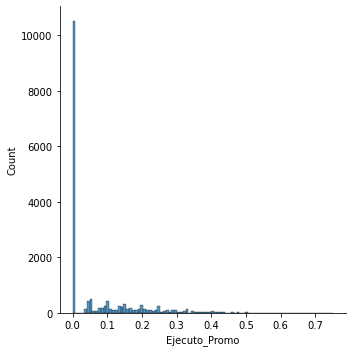

In [142]:
import seaborn as sns
sns.displot(data=test_df_output, x="Ejecuto_Promo")

In [60]:
test_df_output.to_csv("output.csv",index=False)

In [143]:
test_df_output.loc[test_df_output.Ejecuto_Promo == 0, 'Ejecuto_Promo'] = 0.01

In [144]:
test_df_output.to_csv("output.csv",index=False)

#Validating september test_df

In [134]:
executed_promos_df2=executed_promos_df.copy()
executed_promos_df2['Exec']=1
executed_promos_df2

,CodigoDC,Cliente,Marca,Cupo,Exec
0,297601,8410,29,9,1
1,297601,9337,29,9,1
2,309843,7404,40,16,1
3,309874,4017,40,16,1
4,309910,6316,40,16,1
...,...,...,...,...,...
27789,651436,9798,39,20,1
27790,651588,2397,39,20,1
27791,651597,4430,40,16,1
27792,651617,7347,39,20,1


In [135]:
valid_df = executed_promos_df2.merge(active_promos_df, on=['Cliente','Marca','Cupo','CodigoDC'], how='left')
valid_df

,CodigoDC,Cliente,Marca,Cupo,Exec,Fecha_Desde,Fecha_Hasta
0,297601,8410,29,9,1,2018-08-06,2018-08-30
1,297601,9337,29,9,1,2018-08-06,2018-08-30
2,309843,7404,40,16,1,2018-08-12,2018-08-23
3,309874,4017,40,16,1,2018-08-12,2018-08-20
4,309910,6316,40,16,1,2018-08-12,2018-08-17
...,...,...,...,...,...,...,...
27789,651436,9798,39,20,1,2019-08-27,2019-08-30
27790,651588,2397,39,20,1,2019-08-27,2019-08-30
27791,651597,4430,40,16,1,2019-08-27,2019-08-30
27792,651617,7347,39,20,1,2019-08-27,2019-08-30


In [136]:
valid_df.groupby(by=['Marca','Cupo','Cliente']).count()


CodigoDC  Exec  Fecha_Desde  Fecha_Hasta
Marca Cupo Cliente                                          
29    9    11              1     1            1            1
           15              1     1            1            1
           16              1     1            1            1
           19              1     1            1            1
           21              1     1            1            1
...                      ...   ...          ...          ...
40    16   15037           1     1            1            1
           15039           1     1            1            1
           15049           1     1            1            1
           15056           1     1            1            1
           15062           2     2            2            2

[8426 rows x 4 columns]

In [137]:
from datetime import datetime as dt

valid_df['Fecha_Desde']=pd.to_datetime(valid_df['Fecha_Desde'])
valid_df=valid_df[valid_df['Fecha_Desde']>'2019-08-31']

In [138]:
valid_df.groupby(by=['Marca','Cupo','Cliente']).count()
#valid_df

,,,CodigoDC,Exec,Fecha_Desde,Fecha_Hasta
Marca,Cupo,Cliente,,,,


In [132]:
valid_df

,Cliente,Marca,Cupo,Ejecuto_Promo,CodigoDC,Fecha_Desde,Fecha_Hasta
16,10,40,16,1,683251,2019-09-22,2019-09-26
17,10,40,16,1,672331,2019-09-11,2019-09-17
22,17,29,9,1,659955,2019-09-05,2019-09-14
25,37,29,9,1,660511,2019-09-05,2019-09-14
27,37,29,9,1,659966,2019-09-05,2019-09-14
...,...,...,...,...,...,...,...
288522,15056,40,16,1,672175,2019-09-11,2019-09-17
288527,15057,29,9,1,661117,2019-09-07,2019-09-14
288529,15057,29,9,1,661283,2019-09-07,2019-09-14
288531,15064,29,9,1,659402,2019-09-05,2019-09-14


In [103]:
valid_df = valid_df.dropna().groupby(by=['Marca','Cupo','Cliente','Fecha_Hasta']).count()